**By Kurosh Karimi**

## Selected Socioeconomic Indicators in Chicago
### (This project is belongs to IBM Data Analytics Professional Course)
The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators


The data is found in the following url, and the downloaded data is attached to this directory

In [1]:
url = 'https://data.cityofchicago.org/resource/jcxq-k9xf.csv'

## Task:

1. Create a Sqlite database instance, "Chicago.db", and connect to it.
2. Read the csv file from the url and store the data in the "Chicago" database. Name it "SocioEconomic_Indicator".
3. How many rows are in the dataset?
4. How many community areas in Chicago have a hardship index greater than 50.0?
5. What is the maximum value of hardship index in this dataset?
6. Which community area has the highest hardship index?
7. Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.


1. Create a Sqlite database instance, "Chicago.db", and connect to it.

In [2]:
# !pip install ipython-sql
# !pip install pandas


In [14]:
import pandas as pd
import csv, sqlite3
%load_ext sql


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [4]:
%sql sqlite:///Chicago.db

In [5]:
# Create a connection to the SQLite database
con = sqlite3.connect("Chicago.db")

2. Read the csv file from the url and store the data in the "Chicago" database. Name it "SocioEconomic_Indicator".

In [6]:
df = pd.read_csv('data.csv')
df.to_sql('SocioEconomic_Indicator', con, if_exists='replace', index=False, method='multi')
con.close()

In [7]:
%sql SELECT * FROM SocioEconomic_Indicator;

 * sqlite:///Chicago.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


3. How many rows are in the dataset?

In [8]:
%sql SELECT COUNT(*) FROM SocioEconomic_Indicator;

 * sqlite:///Chicago.db
Done.


COUNT(*)
78


4. How many community areas in Chicago have a hardship index greater than 50.0?

In [9]:
%sql SELECT COUNT(community_area_name) AS NUMBER_COMMUNITY_AREA FROM SocioEconomic_Indicator WHERE hardship_index > 50.0

 * sqlite:///Chicago.db
Done.


NUMBER_COMMUNITY_AREA
38


5. What is the maximum value of hardship index in this dataset?​

In [10]:
%sql SELECT MAX(hardship_index) FROM SocioEconomic_Indicator

 * sqlite:///Chicago.db
Done.


MAX(hardship_index)
98.0


6. Which community area has the highest hardship index?

In [11]:
%sql SELECT community_area_name FROM SocioEconomic_Indicator WHERE hardship_index = (SELECT MAX(hardship_index) FROM SocioEconomic_Indicator)

 * sqlite:///Chicago.db
Done.


community_area_name
Riverdale


7. Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.

In [12]:
# !pip install seaborn

 * sqlite:///Chicago.db
Done.


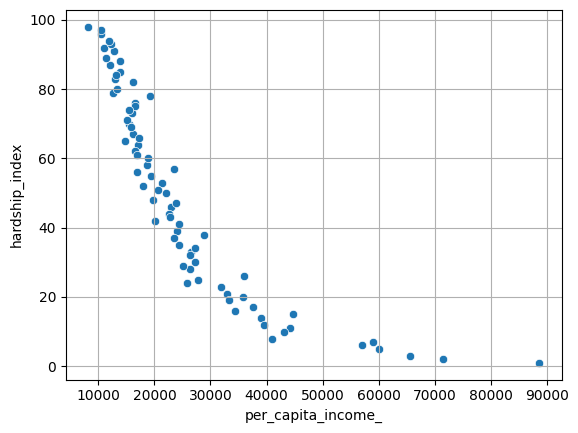

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM SocioEconomic_Indicator;
sns.scatterplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())
plt.grid()